## Analyze a game: 2017 World Series - Game 7

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

import baseball

%matplotlib inline

### All game information can be returned in a single object

In [2]:
game_id, game = baseball.get_game_from_url('11-1-2017', 'HOU', 'LAD', 1)

In [3]:
pitch_tuple_list = []
for inning in game.inning_list:
    for appearance in inning.top_half_appearance_list:
        for event in appearance.event_list:
            if isinstance(event, baseball.Pitch):
                pitch_tuple_list.append(
                    (str(appearance.pitcher), 
                     event.pitch_description,
                     event.pitch_position,
                     event.pitch_speed,
                     event.pitch_type)
                )

In [29]:
data = pd.DataFrame(data=pitch_tuple_list, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
data.head()

,Pitcher,Pitch Description,Pitch Coordinate,Pitch Speed,Pitch Type
0,21 Yu Darvish,Ball,"(155.47, 160.83)",96.0,FF
1,21 Yu Darvish,Called Strike,"(107.0, 171.09)",83.9,FC
2,21 Yu Darvish,"In play, no out","(115.36, 183.1)",83.9,SL
3,21 Yu Darvish,"In play, run(s)","(80.06, 168.03)",96.6,FF
4,21 Yu Darvish,Ball,"(54.1, 216.52)",84.6,SL


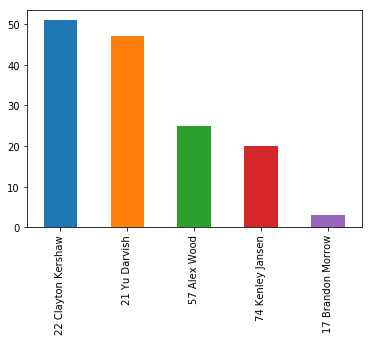

In [5]:
data['Pitcher'].value_counts().plot.bar()

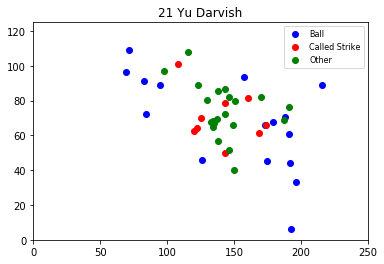

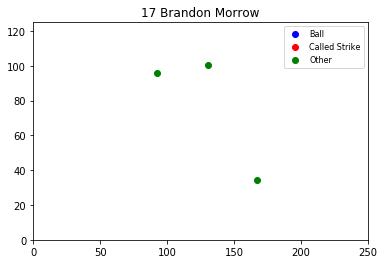

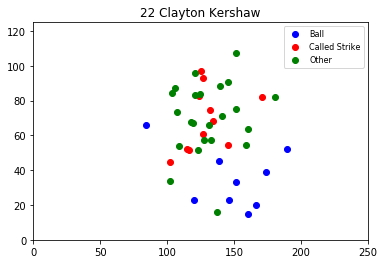

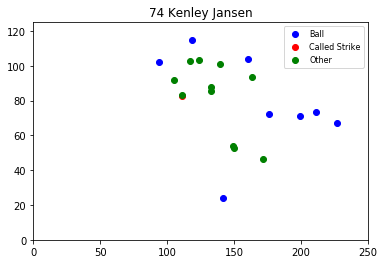

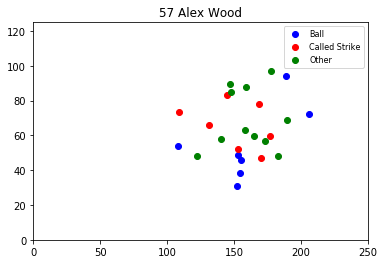

In [6]:
for pitcher in data['Pitcher'].unique():
    plt.ylim(0, 125)
    plt.xlim(0, 250)
    bx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    by = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    cx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    cy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    ox = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    oy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    b = plt.scatter(bx, by, c='b')
    c = plt.scatter(cx, cy, c='r')
    o = plt.scatter(ox, oy, c='g')

    plt.legend((b, c, o),
               ('Ball', 'Called Strike', 'Other'),
               scatterpoints=1,
               loc='upper right',
               ncol=1,
               fontsize=8)

    plt.title(pitcher)
    plt.show()

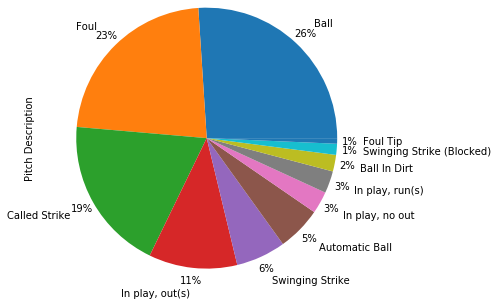

In [7]:
plt.axis('equal')
data['Pitch Description'].value_counts().plot(kind='pie', radius=1.5, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103193be0>]], dtype=object)

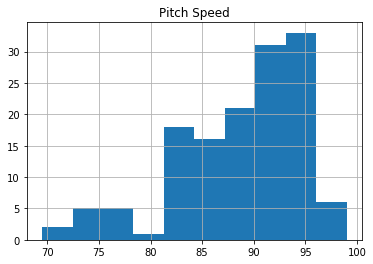

In [8]:
data.dropna(inplace=True)
data.count()
data.hist()

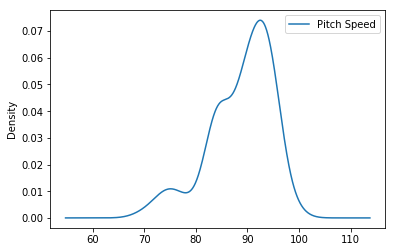

In [9]:
data.plot.kde()

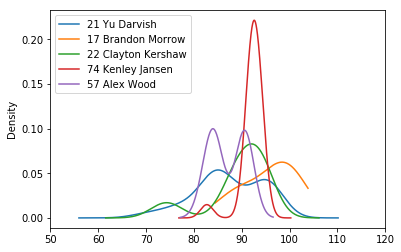

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for pitcher in data['Pitcher'].unique():
    s = data[data['Pitcher'] == pitcher]['Pitch Speed']
    s.plot.kde(ax=ax, label=pitcher)

ax.legend()

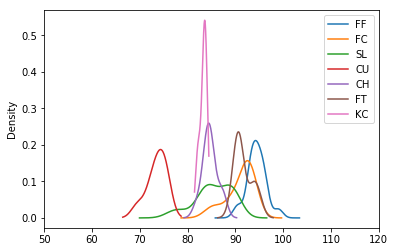

In [11]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for desc in data['Pitch Type'].unique():
    s = data[data['Pitch Type'] == desc]['Pitch Speed']
    s.plot.kde(ax=ax, label=desc)

ax.legend()

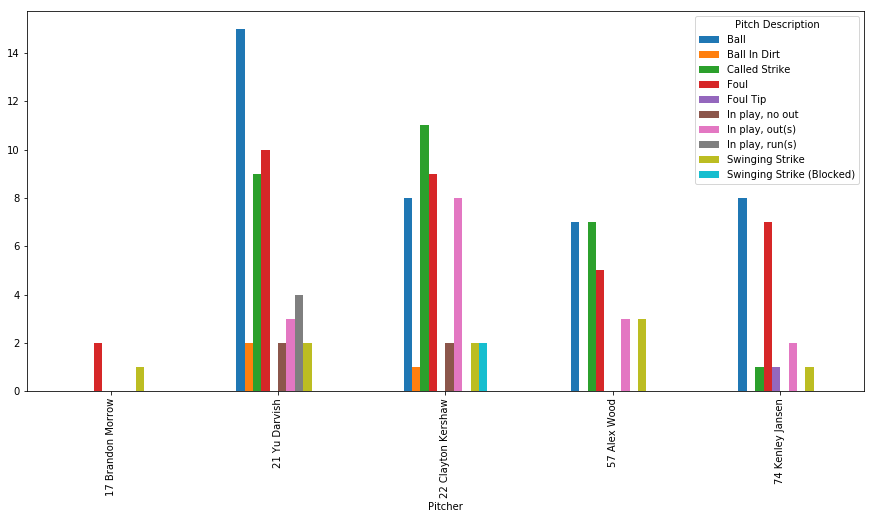

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Description']).size().unstack().plot.bar(ax=ax)

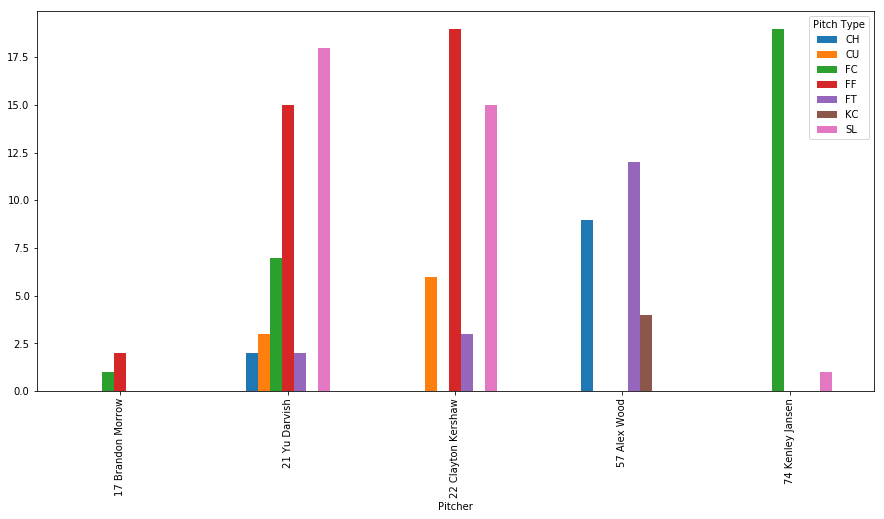

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Type']).size().unstack().plot.bar(ax=ax)

## Analyze a player's season: R.A. Dickey - 2017

In [14]:
game_list_2017 = baseball.get_game_list_from_file_range('1-1-2017', '12-31-2017', '/Users/benjamincrom/repos/livebaseballscorecards-artifacts/baseball_files')
len(game_list_2017)

3001

In [17]:
pitch_tuple_list_2 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' or game.away_team.name == 'Atlanta Braves':
        for inning in game.inning_list:
            for appearance in (inning.top_half_appearance_list +
                               (inning.bottom_half_appearance_list or [])):
                if 'Dickey' in str(appearance.pitcher):
                    for event in appearance.event_list:
                        if isinstance(event, baseball.Pitch):
                            pitch_tuple_list_2.append(
                                (str(appearance.pitcher), 
                                 event.pitch_description,
                                 event.pitch_position,
                                 event.pitch_speed,
                                 event.pitch_type)
                            )

len(pitch_tuple_list_2)

3123

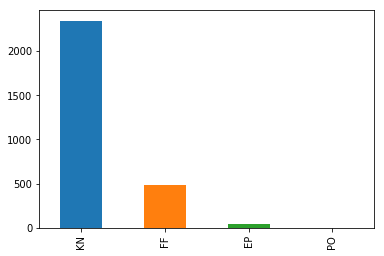

In [18]:
df = pd.DataFrame(data=pitch_tuple_list_2, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
df['Pitch Type'].value_counts().plot.bar()

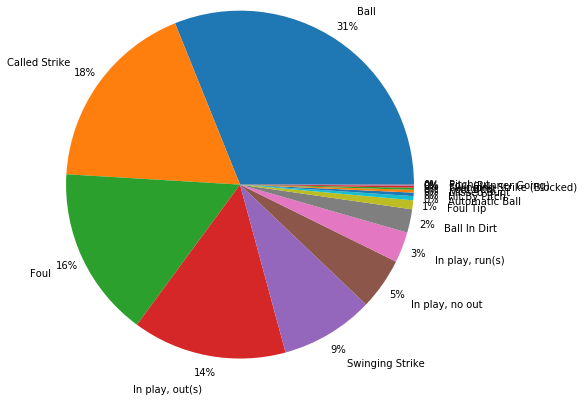

In [19]:
plt.axis('equal')
df['Pitch Description'].value_counts().plot(kind='pie', radius=2, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.ylabel('')
plt.show()

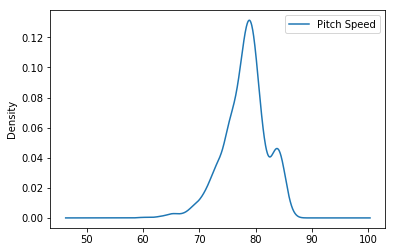

In [20]:
df.dropna(inplace=True)
ax.set_xlim(50, 100)
df.plot.kde()
ax.legend()

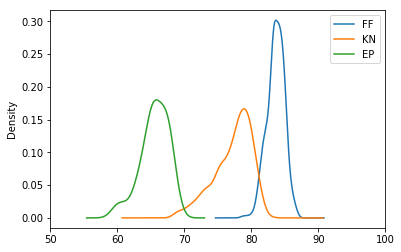

In [21]:
fig, ax = plt.subplots()
ax.set_xlim(50, 100)
for desc in df['Pitch Type'].unique():
    if desc != 'PO':
        s = df[df['Pitch Type'] == desc]['Pitch Speed']
        s.plot.kde(ax=ax, label=desc)

ax.legend()

## Analyze a lineup of pitchers: Atlanta Braves - 2017 Regular Season

In [23]:
import datetime
import dateutil.parser
import pytz
pitch_tuple_list_3 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            for appearance in inning.top_half_appearance_list:
                pitch_tuple_list_3.append(
                    (str(appearance.pitcher),
                     str(appearance.batter),
                     len(appearance.out_runners_list),
                     len(appearance.scoring_runners_list),
                     len(appearance.runners_batted_in_list),
                     appearance.scorecard_summary,
                     appearance.got_on_base,
                     appearance.plate_appearance_summary,
                     appearance.plate_appearance_description,
                     appearance.error_str,
                     appearance.inning_outs)
                )
    if game.away_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            if inning.bottom_half_appearance_list:
                for appearance in inning.bottom_half_appearance_list:
                    pitch_tuple_list_3.append(
                        (str(appearance.pitcher),
                         str(appearance.batter),
                         len(appearance.out_runners_list),
                         len(appearance.scoring_runners_list),
                         len(appearance.runners_batted_in_list),
                         appearance.scorecard_summary,
                         appearance.got_on_base,
                         appearance.plate_appearance_summary,
                         appearance.plate_appearance_description,
                         appearance.error_str,
                         appearance.inning_outs)
                    )

df3 = pd.DataFrame(data=pitch_tuple_list_3, columns=['Pitcher',
                                                     'Batter',
                                                     'Out Runners',
                                                     'Scoring Runners',
                                                     'RBIs',
                                                     'Scorecard',
                                                     'On-base?',
                                                     'Plate Summary',
                                                     'Plate Description',
                                                     'Error',
                                                     'Inning Outs'])


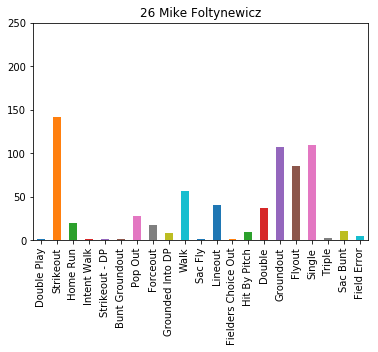

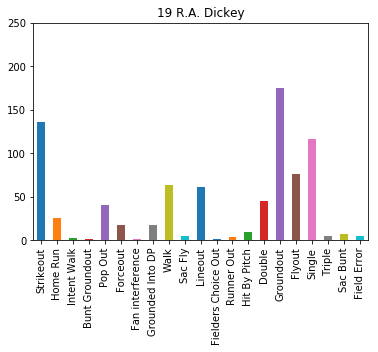

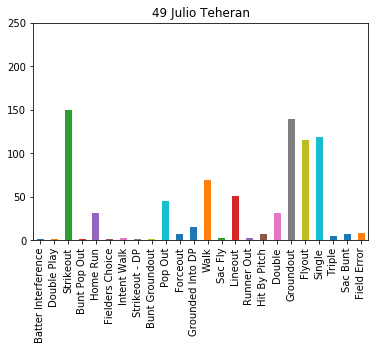

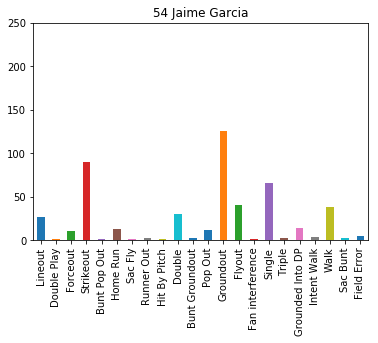

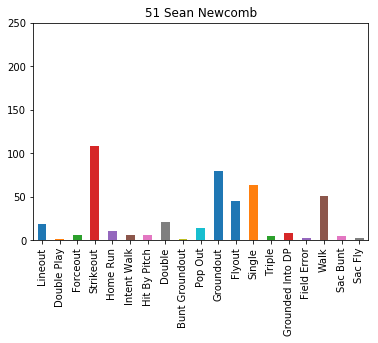

In [24]:
for pitcher in df3['Pitcher'].unique():
    summary = df3[df3['Pitcher'] == pitcher]['Plate Summary']
    s = summary.value_counts(sort=False)
    if len(summary) > 400:
        fig, ax = plt.subplots()
        ax.set_ylim(0, 250)
        s.plot.bar()
        plt.title(pitcher)
        plt.show()


In [25]:
x = []
for pitcher in df3['Pitcher'].unique():
    #f = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()[0]
    s = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()
    if len(s) == 2:
        f = s[0]
        t = s[1]
        x.append((str(pitcher), f, t))

df4 = pd.DataFrame(data=x, columns=['Pitcher',
                                    'Did not get on base',
                                    'Got on base'])


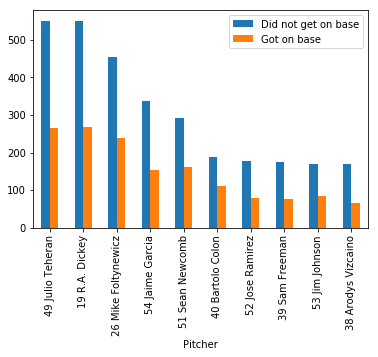

In [26]:
df4.index = df4['Pitcher']
df4.sort_values(by=['Got on base']).nlargest(10, 'Did not get on base').plot.bar()

In [27]:
x = []
for batter in df3['Batter'].unique():
    s = df3[df3['Batter'] == batter]['On-base?']
    if True in s.value_counts():
        t = s.value_counts()[True]
    else:
        t = 0

    if False in s.value_counts():
        f = s.value_counts()[False]
    else:
        f = 0        

    if f != 0 or t != 0:
        success = t / (f + t)
    else:
        success = None

    if f or f == 0:
        x.append((str(batter), success, t, f))

df5 = pd.DataFrame(data=x, columns=['Batter',
                                    'Success',
                                    'Got on base',
                                    'Did not get on base'])


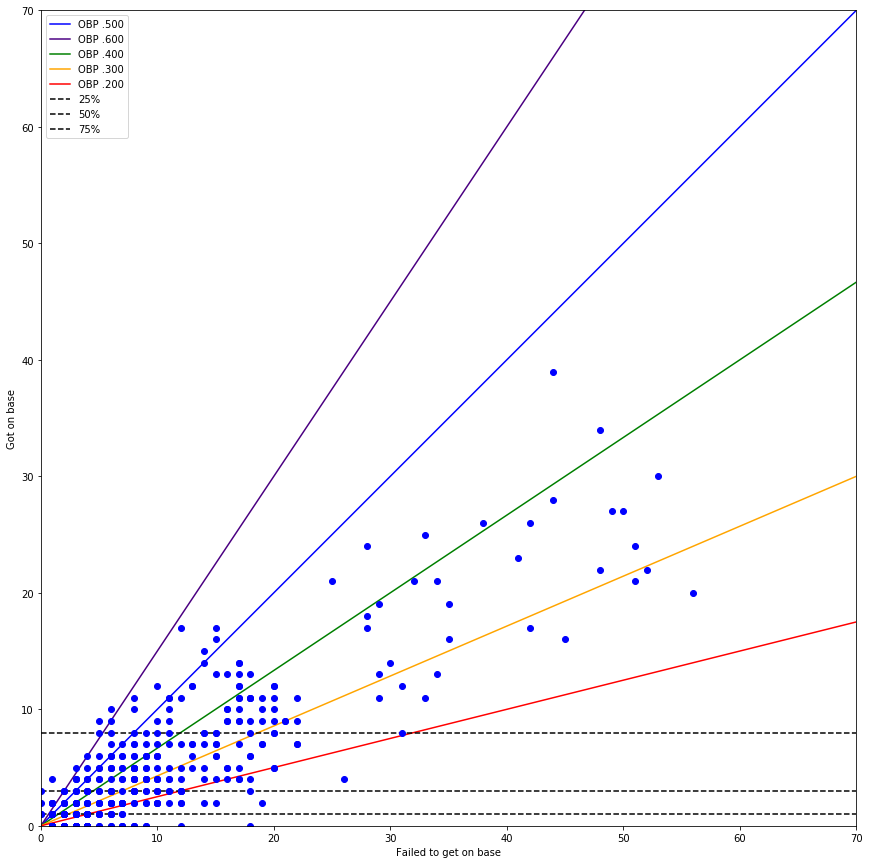

,Batter,Success,Got on base,Did not get on base
18,21 Christian Yelich,0.469880,39,44
58,16 Cesar Hernandez,0.414634,34,48
19,27 Giancarlo Stanton,0.361446,30,53
49,11 Ryan Zimmerman,0.388889,28,44
286,13 Asdrubal Cabrera,0.355263,27,49
16,9 Dee Gordon,0.350649,27,50
46,6 Anthony Rendon,0.382353,26,42
63,37 Odubel Herrera,0.406250,26,38
47,34 Bryce Harper,0.431034,25,33
21,13 Marcell Ozuna,0.320000,24,51


In [28]:
fig, ax = plt.subplots(figsize=(15,15))
plt.ylim(0, 70)
plt.xlim(0, 70)

lims = [0, 70]
ax.plot(lims, lims, 'k-', alpha=1.0, zorder=0, color="blue", label="OBP .500")
lims_600 = [0, 105]
ax.plot(lims, lims_600, 'k-', alpha=1.0, zorder=0, color="indigo", label="OBP .600")
lims_400 = [0, 46.667]
ax.plot(lims, lims_400, 'k-', alpha=1.0, zorder=0, color="green", label="OBP .400")
lims_300 = [0, 30]
ax.plot(lims, lims_300, 'k-', alpha=1.0, zorder=0, color="orange", label="OBP .300")
lims_200 = [0, 17.5]
ax.plot(lims, lims_200, 'k-', alpha=1.0, zorder=0, color="red", label="OBP .200")

horiz = [1, 1]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="25%")
horiz = [3, 3]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="50%")
horiz = [8, 8]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="75%")


ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set(xlabel="Failed to get on base", ylabel="Got on base")

t = df5['Got on base']
f = df5['Did not get on base']
plt.legend()
b = plt.scatter(f, t, c='b')
plt.show()

df5.sort_values('Got on base', ascending=False)